<a href="https://colab.research.google.com/github/ane-schow/oceanografia/blob/main/campo_de_vetore_vel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

abrindo os dados

In [ ]:
fne = 'ecur.nc'
dse = xr.open_dataset(fne)
dse.info()
ve = dse['uo'].isel(time=0, depth=slice(0,18), latitude=slice(0,164), longitude=slice(0,182)).mean(dim='depth')
lat = dse['latitude']
lon = dse['longitude']
clean_ve = np.squeeze(ve)

fnn = 'ncur.nc'
dsn = xr.open_dataset(fnn)
vn = dsn['vo'].isel(time=0, depth=slice(0,18), latitude=slice(0,164), longitude=slice(0,182)).mean(dim='depth')
clean_vn = np.squeeze(vn)

xarray.Dataset {
dimensions:
	depth = 18 ;
	latitude = 164 ;
	longitude = 182 ;
	time = 1 ;

variables:
	float32 depth(depth) ;
		depth:axis = Z ;
		depth:long_name = Depth ;
		depth:positive = down ;
		depth:standard_name = depth ;
		depth:unit_long = Meters ;
		depth:units = m ;
		depth:valid_max = 5727.9169921875 ;
		depth:valid_min = 0.49402499198913574 ;
	float32 latitude(latitude) ;
		latitude:axis = Y ;
		latitude:long_name = Latitude ;
		latitude:standard_name = latitude ;
		latitude:unit_long = Degrees North ;
		latitude:units = degrees_north ;
		latitude:valid_max = 90.0 ;
		latitude:valid_min = -80.0 ;
	float32 longitude(longitude) ;
		longitude:axis = X ;
		longitude:long_name = Longitude ;
		longitude:standard_name = longitude ;
		longitude:unit_long = Degrees East ;
		longitude:units = degrees_east ;
	datetime64[ns] time(time) ;
		time:axis = T ;
		time:long_name = Time ;
		time:standard_name = time ;
	float32 uo(time, depth, latitude, longitude) ;
		uo:long_name = Eastwa

tirar nan

In [ ]:
cve = clean_ve.fillna(0)
cvn = clean_vn.fillna(0)

plot vetor

In [ ]:
magnitude = np.sqrt(cve**2 + cvn**2)
LON, LAT = np.meshgrid(lon, lat)
U = cve
V = cvn

alterarar resolução dos dados para deixar vetores mais claros

In [ ]:
U_subsample = cve[::6, ::6]
V_subsample = cvn[::6, ::6]
LON_subsample = LON[::6, ::6]
LAT_subsample = LAT[::6, ::6]

In [ ]:
magnitude = np.sqrt(U_subsample**2 + V_subsample**2)

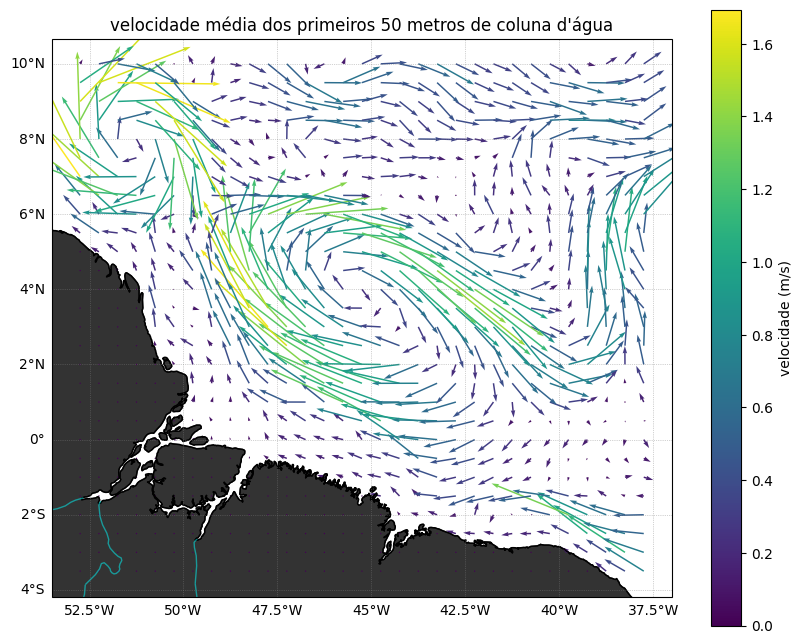

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
q = ax.quiver(LON_subsample, LAT_subsample, U_subsample, V_subsample, magnitude, scale=10, transform=ccrs.PlateCarree())
plt.colorbar(q, ax=ax, orientation='vertical', label='velocidade (m/s)')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, color='k', alpha=0.8)
ax.add_feature(cfeature.RIVERS.with_scale('50m'), edgecolor='aqua',alpha=0.5)
gl = ax.gridlines(draw_labels=True, linewidth=0.5,color='gray',alpha=0.7, linestyle=':')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.set_title("velocidade média dos primeiros 50 metros de coluna d'água")
plt.savefig('analise vel.png', dpi=300)
plt.show()